<a href="https://colab.research.google.com/github/drfrostongithub/collab/blob/main/Naive_Bayes_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')

#filepath
file_path='/content/drive/My Drive/iris_data.csv'

data= pd.read_csv(file_path)
print(data)

Mounted at /content/drive
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
import numpy as np
#mengolah data berbentuk matrik dan vektor

import pandas as pd
#mengolah data berbentuk baris dan kolom

from sklearn.preprocessing import LabelEncoder
#prepocessing data menggunakan algoritma tertentu, konversi data menjadi numerik
from sklearn.model_selection import train_test_split
#membagi data
from sklearn.preprocessing import StandardScaler
#mengskala data numerik agar memiliki rentang yg tidak terlalu jauh
from sklearn.metrics import confusion_matrix
#Import confusion_matrix from skelarn metrics mengunakan kinerja model
from sklearn.metrics import classification_report
#Import classification_report from skelarn metrics mengunakan kinerja model
from sklearn.metrics import accuracy_score
#Import accuracy_score from skelarn metrics mengunakan kinerja model
from sklearn.naive_bayes import GaussianNB
#Import GaussianNB from skelarn naive_bayes

In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/iris_data.csv')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()
#membaca dataset
#type yaitu tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.empty

False

In [ ]:
#1. Feature selection : Choose the columns you want to use as features
# Replace 'feature_column1', 'feature_column2', etc, with the actual column name from your dataset
# For the iris dataset, these are likely "SepalLengtCM, SepalWidthCm, PetalLengthCm, PetalWidthCm"
x = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

#2. Extract the target variabel
y = dataset['Species']
#Replace 'target_variable_column' with the actual column name, likely 'Species' for iris dataset

#3. Data splitting: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)
#adjust test_size and random_state as needed

#4. Feature scaling (optional but recommended for Gaussian Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #this will be X_train_selected
X_test = scaler.transform(X_test)

#5. Model training
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #fitting with X_train_selected

GaussianNB()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='tanh', max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000)

In [ ]:
clf.predict(X_test)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype='<U15')

In [ ]:
clf.predict_proba(X_test)

array([[6.19749018e-03, 9.93498535e-01, 3.03975164e-04],
       [1.84236321e-05, 2.68366361e-01, 7.31615216e-01],
       [9.97254146e-01, 2.74585352e-03, 7.93839217e-10],
       [9.99099277e-01, 9.00722816e-04, 3.73651657e-10],
       [1.11903049e-06, 7.63588137e-03, 9.92363000e-01],
       [1.91936711e-08, 1.79430056e-04, 9.99820551e-01],
       [1.43263482e-07, 1.63616682e-03, 9.98363690e-01],
       [9.94906018e-01, 5.09397997e-03, 1.94969689e-09],
       [9.97668794e-01, 2.33120513e-03, 8.06570644e-10],
       [1.33139418e-05, 2.76350636e-01, 7.23636050e-01],
       [9.98495244e-01, 1.50475533e-03, 5.33651094e-10],
       [2.26774746e-08, 5.90702485e-04, 9.99409275e-01],
       [9.97830416e-01, 2.16958361e-03, 7.32715161e-10],
       [1.18262966e-07, 1.25522107e-03, 9.98744661e-01],
       [9.38927582e-04, 9.93693658e-01, 5.36741454e-03],
       [9.95232420e-01, 4.76757812e-03, 1.49292736e-09],
       [1.76274162e-03, 9.97970418e-01, 2.66840130e-04],
       [9.99032816e-01, 9.67183

In [ ]:
X_train

array([[ 1.71370359,  0.33120695,  1.3079094 ,  0.81911343],
       [-0.84013026, -1.29577454, -0.40488574, -0.10693675],
       [ 0.37598109, -0.59849676,  0.56569817,  0.02535614],
       [ 1.10564791,  0.56363287,  1.13662989,  1.74516361],
       [-0.84013026,  1.49333658, -1.26128331, -1.03298693],
       [-1.44818594,  0.09878102, -1.26128331, -1.29757269],
       [-0.71851913, -0.83092269,  0.1089528 ,  0.2899419 ],
       [ 0.25436996, -1.99305232,  0.73697769,  0.42223478],
       [-0.47529686, -0.13364491,  0.45151183,  0.42223478],
       [-0.9617414 ,  0.7960588 , -1.26128331, -1.29757269],
       [-1.56979708, -1.76062639, -1.37546966, -1.16527981],
       [-1.08335253, -1.52820047, -0.23360623, -0.23922963],
       [ 0.86242564, -0.13364491,  1.19372306,  1.34828496],
       [-1.69140821, -0.36607083, -1.31837648, -1.29757269],
       [ 1.59209245, -0.13364491,  1.25081623,  1.21599208],
       [-0.84013026,  1.02848472, -1.31837648, -1.16527981],
       [-1.69140821,  0.

In [ ]:
X_test

array([[-0.23207458, -0.13364491,  0.22313915,  0.15764902],
       [ 0.61920337, -1.29577454,  0.67988452,  0.42223478],
       [-0.47529686,  0.7960588 , -1.14709697, -1.29757269],
       [-0.47529686,  1.95818843, -1.37546966, -1.03298693],
       [ 0.86242564, -0.13364491,  0.85116403,  1.0836992 ],
       [ 1.10564791,  0.09878102,  1.07953672,  1.61287073],
       [-0.11046345, -1.29577454,  0.73697769,  1.0836992 ],
       [-0.84013026,  0.56363287, -1.14709697, -0.90069404],
       [-1.20496367, -0.13364491, -1.31837648, -1.42986557],
       [ 0.49759223, -1.99305232,  0.45151183,  0.42223478],
       [-0.84013026,  0.7960588 , -1.26128331, -1.29757269],
       [ 1.95692586, -0.59849676,  1.36500257,  0.95140631],
       [-1.08335253,  0.09878102, -1.26128331, -1.42986557],
       [ 1.22725904, -0.13364491,  1.02244355,  1.21599208],
       [-0.11046345, -0.59849676,  0.45151183,  0.15764902],
       [-0.9617414 , -0.13364491, -1.20419014, -1.29757269],
       [ 0.01114769, -0.

<ipython-input-52-fcfa1d82845e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SepalLengthCm'])


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

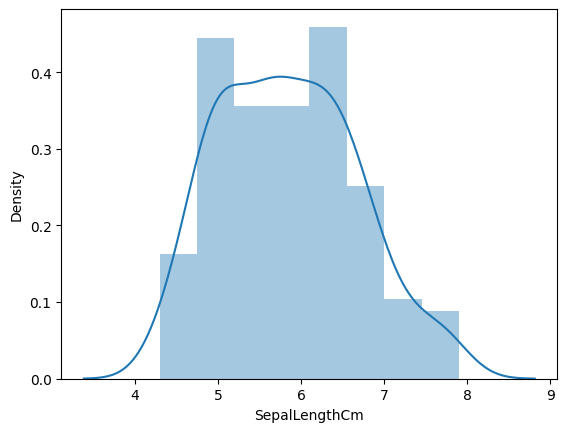

In [ ]:
import seaborn as sns
sns.distplot(data['SepalLengthCm'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='SepalWidthCm'>

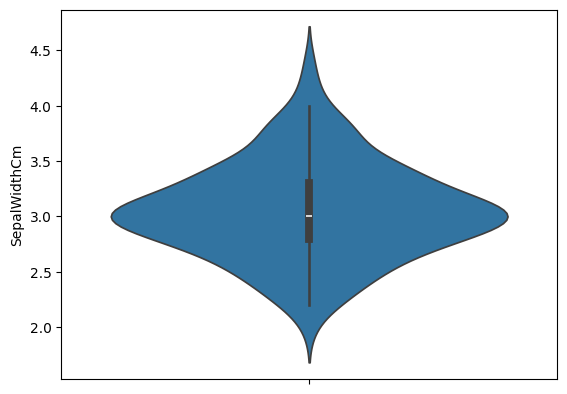

In [ ]:
sns.violinplot(data['SepalWidthCm'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='PetalLengthCm'>

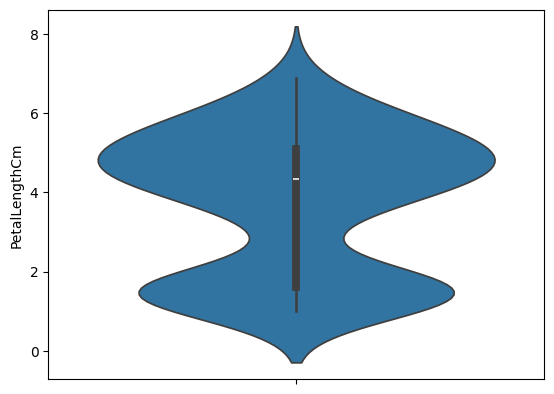

In [ ]:
sns.violinplot(data['PetalLengthCm'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='PetalWidthCm'>

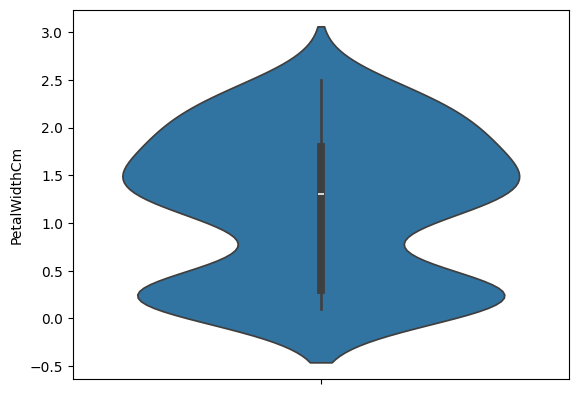

In [ ]:
sns.violinplot(data['PetalWidthCm'])

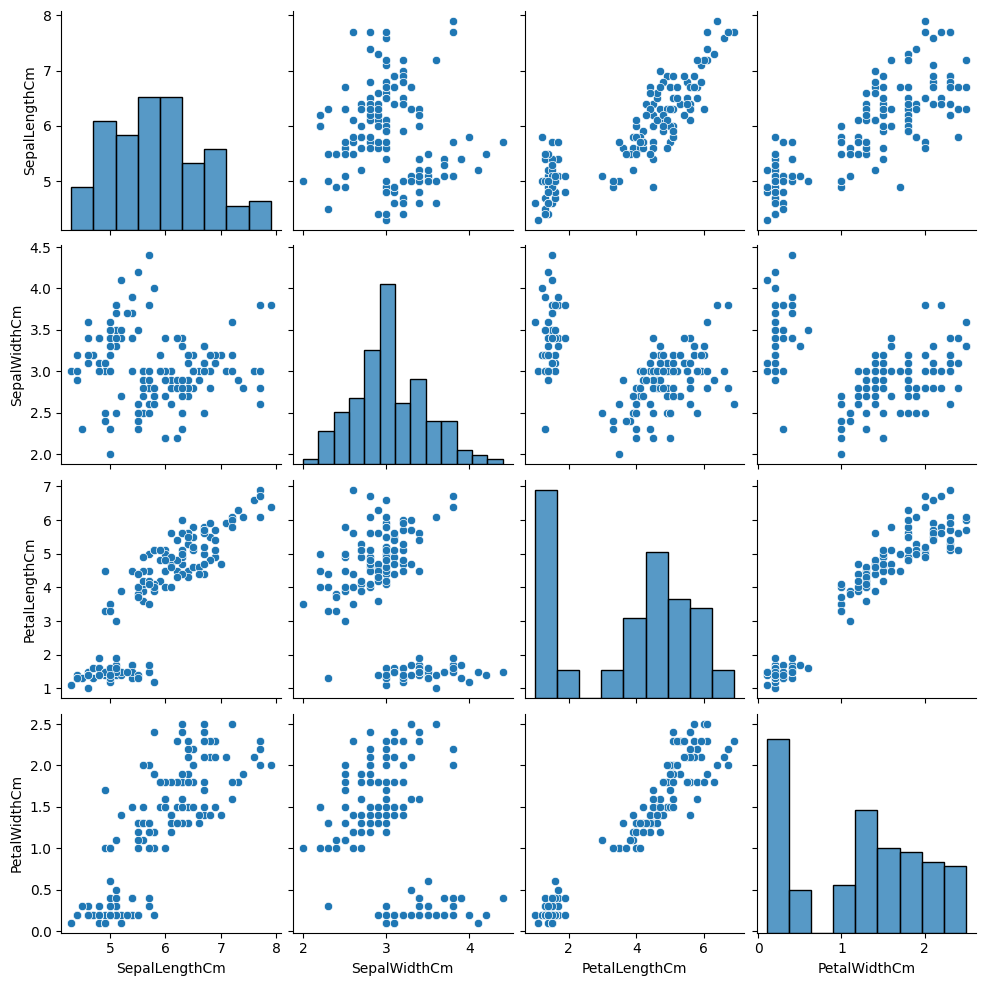

In [ ]:
sns.pairplot(data)

In [ ]:
#6. Prediction and evaluation
#Ensure you are adding the scaled y_pred for prediction
y_pred = model_nb.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


In [ ]:
model_nb.score(X_test, y_test)


0.8666666666666667

In [ ]:
#6 Prediction and evaluation
predictions = model_nb.predict(X_test)
print(predictions)

#corrected variable name to "predictions"
for i, j in zip(y_test, predictions):
  print(i, j)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-se

In [ ]:
model_nb.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [ ]:
model_nb.predict_proba(X_test)

array([[4.35568186e-051, 9.88072492e-001, 1.19275082e-002],
       [3.22104980e-089, 5.64177901e-001, 4.35822099e-001],
       [9.99999907e-001, 9.32518358e-008, 3.17225632e-013],
       [1.00000000e+000, 9.44598434e-012, 2.92525944e-017],
       [3.84679110e-105, 5.83542326e-002, 9.41645767e-001],
       [7.71391786e-129, 3.36394933e-003, 9.96636051e-001],
       [7.50639698e-092, 6.97120494e-001, 3.02879506e-001],
       [9.99999956e-001, 4.35290450e-008, 8.65844972e-014],
       [9.99999999e-001, 1.02959980e-009, 4.12410463e-016],
       [1.06155057e-070, 9.57368519e-001, 4.26314814e-002],
       [9.99999999e-001, 8.58181365e-010, 1.23140999e-015],
       [2.37655746e-165, 4.42880694e-005, 9.99955712e-001],
       [9.99999997e-001, 2.66483922e-009, 1.79461481e-015],
       [9.61155201e-124, 5.62457143e-003, 9.94375429e-001],
       [4.42250167e-068, 9.40943326e-001, 5.90566740e-002],
       [9.99999972e-001, 2.83380943e-008, 2.21450507e-014],
       [6.71663540e-045, 9.96301893e-001

In [ ]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #example model
from sklearn.metrics import confusion_matrix

#Assuming 'data' is your DataFrame and 'Sepcies' is the target column:
X = data.drop('Species', axis=1) #Features
y = data['Species'] #target variable


#3. Data splitting: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

#Initialize and train a model (example using Logisgtic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

#4. Prediction and evaluation
y_pred = model.predict(X_test)

# Now you can calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#jumlah data yg diprediksi secara benar dan salah

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'Iris-versicolor'

In [ ]:
akurasi_skor=accuracy_score(y_test, y_pred)
akurasi_klasifikasi=classification_report(y_test, y_pred)
print("Tingkat Akurasi: %d persen" % (akurasi_skor*100))
print(akurasi_klasifikasi)

Tingkat Akurasi: 96 persen
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

